<img align=center src="https://rhyme.com/assets/img/logo-dark.png"></img>
<h2 align=center> Named Entity Recognition (NER) using LSTMs with Keras</h2>

### Task 1: Project Overview and Import Modules

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(0)
plt.style.use("ggplot")

import tensorflow as tf
print('Tensorflow version:', tf.__version__)
print('GPU detected:', tf.config.list_physical_devices('GPU'))

Tensorflow version: 2.1.0
GPU detected: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Task 2: Load and Explore the NER Dataset

*Essential info about tagged entities*:
- geo = Geographical Entity
- org = Organization
- per = Person
- gpe = Geopolitical Entity
- tim = Time indicator
- art = Artifact
- eve = Event
- nat = Natural Phenomenon

In [7]:
data = pd.read_csv('ner_dataset.csv', encoding='latin1')
data = data.fillna(method='ffill')

data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [11]:
print('Unique words - ', data['Word'].nunique())
print('Unique tags  - ', data['Tag'].nunique())

Unique words -  35178
Unique tags  -  17


In [13]:
words = list(set(data["Word"].values))
words.append("ENDPAD")

num_words = len(words)

In [14]:
tags = list(set(data["Tag"].values))
num_tags = len(tags)

In [15]:
num_words, num_tags

(35179, 17)

### Task 3: Retrieve Sentences and Corresponsing Tags

In [23]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        
        agg_func = lambda s: [(w, p, t) for w, p , t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]

In [24]:
getter = SentenceGetter(data)
sentences = getter.sentences

In [26]:
sentences[1]

[('Iranian', 'JJ', 'B-gpe'),
 ('officials', 'NNS', 'O'),
 ('say', 'VBP', 'O'),
 ('they', 'PRP', 'O'),
 ('expect', 'VBP', 'O'),
 ('to', 'TO', 'O'),
 ('get', 'VB', 'O'),
 ('access', 'NN', 'O'),
 ('to', 'TO', 'O'),
 ('sealed', 'JJ', 'O'),
 ('sensitive', 'JJ', 'O'),
 ('parts', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('the', 'DT', 'O'),
 ('plant', 'NN', 'O'),
 ('Wednesday', 'NNP', 'B-tim'),
 (',', ',', 'O'),
 ('after', 'IN', 'O'),
 ('an', 'DT', 'O'),
 ('IAEA', 'NNP', 'B-org'),
 ('surveillance', 'NN', 'O'),
 ('system', 'NN', 'O'),
 ('begins', 'VBZ', 'O'),
 ('functioning', 'VBG', 'O'),
 ('.', '.', 'O')]

### Task 4: Define Mappings between Sentences and Tags

In [27]:
word2idx = {w: i+1 for i, w in enumerate(words)}
tag2idx = {t: i+1 for i, t in enumerate(tags)}

In [28]:
word2idx

{'Asset': 1,
 'spree': 2,
 'hurricane': 3,
 '13,090': 4,
 'Bids': 5,
 'Africa': 6,
 'tabloids': 7,
 'Pakhtoonkhaw': 8,
 'Hydropower': 9,
 'Forster': 10,
 'Sardinian': 11,
 'Baikonur': 12,
 'hander': 13,
 'bedroom': 14,
 '11-nation': 15,
 'Armin': 16,
 'crackdowns': 17,
 'centerpiece': 18,
 'crippling': 19,
 'Albar': 20,
 'refusing': 21,
 'wireless': 22,
 'ranchers': 23,
 'chronically': 24,
 'obesity': 25,
 '4.5': 26,
 'deception': 27,
 'Lander': 28,
 '880': 29,
 'Tourists': 30,
 'Promise': 31,
 'Rabat': 32,
 '439': 33,
 'confiscated': 34,
 'Euphausia': 35,
 'dignitaries': 36,
 'Kenenisa': 37,
 'exploded': 38,
 'Dunham': 39,
 'close-ally': 40,
 '191': 41,
 'book': 42,
 'unleashing': 43,
 'lunch': 44,
 '347': 45,
 'Connie': 46,
 'accomplishments': 47,
 'Tueni': 48,
 'Husin': 49,
 'whisky': 50,
 'job': 51,
 'Maastricht': 52,
 'carryover': 53,
 'abductee': 54,
 'Pro-Taleban': 55,
 'Groenefeld': 56,
 'Yar': 57,
 'bitten': 58,
 'pedophilia': 59,
 'amend': 60,
 'secretive': 61,
 'deeply': 62,

### Task 5: Padding Input Sentences and Creating Train/Test Splits

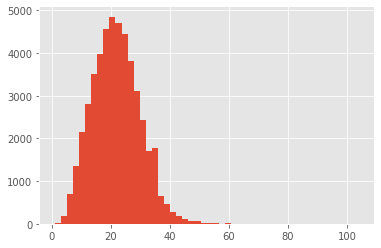

In [31]:
plt.hist([len(s) for s in sentences], bins=50)
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sepquences
from tensorflow.keras.utils import to_categorical

max_len = 50

### Task 6: Build and Compile a Bidirectional LSTM Model

In [ ]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

### Task 7: Train the Model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.tf_keras import PlotLossesCallback

### Task 8: Evaluate Named Entity Recognition Model